<a href="https://colab.research.google.com/github/gabipasse/clusteringNaMao/blob/main/clusteringNaMao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import copy


In [ ]:
data = pd.read_csv("CC GENERAL.csv")

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6])

In [ ]:
data = data.iloc[:, 1:-1] #dropar colunas clust_id e tenure

In [ ]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
data = data.fillna(data.median())

In [ ]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
SEED = 1224

pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2, random_state=SEED ))]) #2 dimensoes para poder gerar o grafico

In [ ]:
embedding_pca = pca_pipeline.fit_transform(data)

In [ ]:
embedding_pca

array([[-1.7203633 , -1.06878073],
       [-1.16513206,  2.51195171],
       [ 0.93810144, -0.38267333],
       ...,
       [-0.59640274, -1.82508562],
       [-2.00871151, -0.66914672],
       [-0.21925986, -0.41837037]])

In [ ]:
projection = pd.DataFrame(columns = ["x", "y"], data= embedding_pca)
projection

,x,y
0,-1.720363,-1.068781
1,-1.165132,2.511952
2,0.938101,-0.382673
3,-0.921952,0.007297
4,-1.638459,-0.680244
...,...,...
8945,-0.027956,-2.031116
8946,-0.249119,-1.692904
8947,-0.596403,-1.825086
8948,-2.008712,-0.669147


In [ ]:
projection.shape

(8950, 2)

In [ ]:
projection = projection.iloc[:100,:] #agilizar a depuracao das funcoes

In [ ]:
projection.shape

(100, 2)

In [ ]:
np.zeros((1, projection.shape[1]), dtype=object)

array([[0, 0]], dtype=object)

In [ ]:
def euclidean_distance(defined_centroids: np.ndarray, to_be_compared: pd.core.series.Series): #executado 1x para cada a 1 registro a ser comparado

  current_sum_checking = 0 #MDS ELE TAVA COMPARANDO COM OS ZEROS QUE TAO VAZIOS AAA EZ AGORA

  for count, value in enumerate(defined_centroids):

    if not np.all(value == 0):

      current_sum_checking += np.linalg.norm(to_be_compared - defined_centroids[count])

  return current_sum_checking

In [ ]:
def initialize_centroids(amt_centroids: int, dataframe: pd.DataFrame, random_seed: int = None):

  try:

    dataframe = dataframe.round(2)

  except ValueError as e:

    raise

  if random_seed is not None:

    np.random.seed(random_seed)

  centroid_coordinates = np.zeros((amt_centroids, dataframe.shape[1]), dtype=object) #usando nd.array para poder aplicar o metodo norm do np.linalg

  historic_coordinates = []

  try:

    centroid_coordinates[0] = dataframe.iloc[np.random.randint(0, len(dataframe)), :]

    historic_coordinates.append(centroid_coordinates)

  except ValueError as e:

    raise

  current_biggest_distance = {"distance": 0, "index": 0}

  for i in range(1, amt_centroids):

    current_biggest_distance = {"distance": 0, "index": 0}

    for count, (_, row_value) in enumerate(dataframe.iterrows()): #nao precisa excluir a possibilidade de definir mesmo registro para 2 centroides diferentes, proprio calculo de distancia vai fazer isso

      current_distance = euclidean_distance(centroid_coordinates, row_value) #aq tava errado, tava pegando a soma? sim

      if current_distance > current_biggest_distance["distance"]:

        current_biggest_distance["distance"] = current_distance

        current_biggest_distance["index"] = count

        append_historic = np.copy(centroid_coordinates)

        append_historic[i] = dataframe.iloc[current_biggest_distance["index"], :]

        historic_coordinates.append(append_historic) #treta nao é do append

    centroid_coordinates[i] = dataframe.iloc[current_biggest_distance["index"], :].values #acho que eu deveria estar usando values aq

  historic_coordinates[0][1:] = [0] * (len(historic_coordinates[0]) - 1)

  return historic_coordinates[-1][:], historic_coordinates #só depurar; retornar tanto valores quanto indexes > dps colocar um retorno para plottar os centroides durante definicao


In [ ]:
centroid_coordinates, historic_coordinates= initialize_centroids(amt_centroids= 3, dataframe= projection, random_seed= 1226)

In [ ]:
centroid_coordinates

array([[-1.17, 2.51],
       [4.79, 10.95],
       [6.34, -0.71]], dtype=object)

In [ ]:
historic_coordinates

[array([[-1.17, 2.51],
        [0, 0],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [-1.72, -1.07],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [6.34, -0.71],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [-1.72, -1.07]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [6.34, -0.71]], dtype=object)]

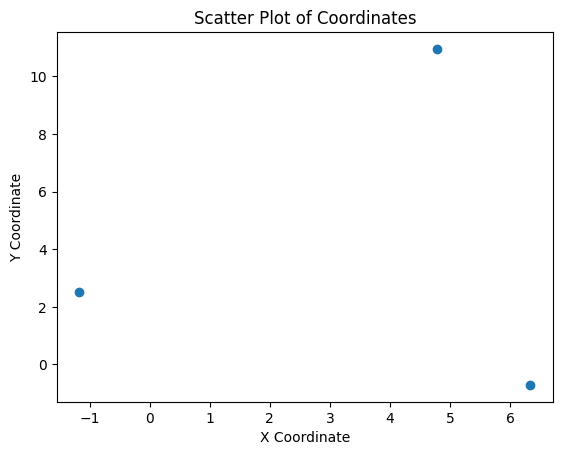

In [ ]:
plt.scatter(centroid_coordinates[:, 0], centroid_coordinates[:, 1])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Coordinates')
plt.show()

In [ ]:
#plottar as modificacoes dos centroides!!

In [ ]:
historic_coordinates

[array([[-1.17, 2.51],
        [0, 0],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [-1.72, -1.07],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [6.34, -0.71],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [0, 0]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [-1.72, -1.07]], dtype=object),
 array([[-1.17, 2.51],
        [4.79, 10.95],
        [6.34, -0.71]], dtype=object)]

In [ ]:
def plot_coordinates(historic_coordinates, i):

  points = historic_coordinates[i]

  filtered_points = [point for point in points if point[0] != 0 or point[1] != 0]

  x_coords = [point[0] for point in filtered_points]

  y_coords = [point[1] for point in filtered_points]

  plt.scatter(x_coords, y_coords)
  plt.xlabel('Coordenada X')
  plt.ylabel('Coordenada Y')
  plt.title('Pontos do Primeiro Numpy Array')
  plt.show()

In [ ]:
x_coords = [point[0] for point in historic_coordinates[0]]

In [ ]:
y_coords = [point[1] for point in historic_coordinates[0]]

In [ ]:
x_coords, y_coords

([-1.17, 0, 0], [2.51, 0, 0])

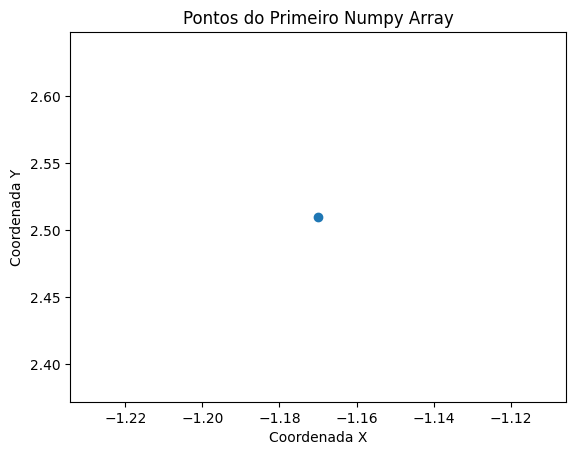

In [ ]:
plot_coordinates(historic_coordinates, 0)

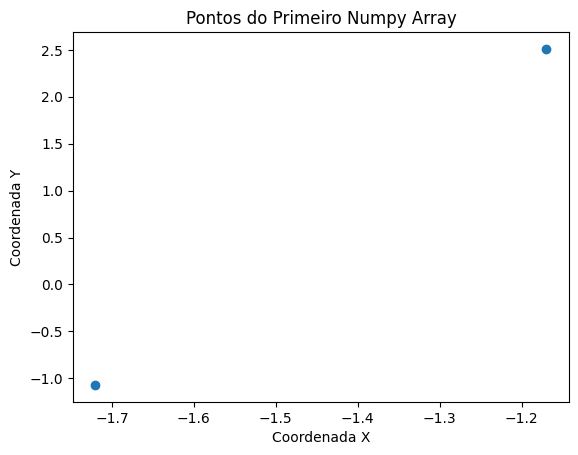

In [ ]:
plot_coordinates(historic_coordinates, 1)

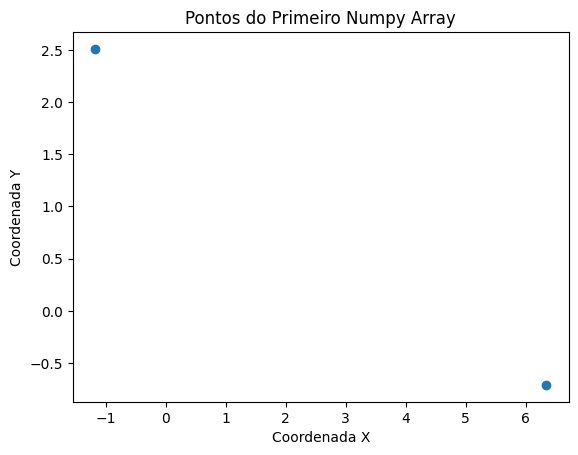

In [ ]:
plot_coordinates(historic_coordinates, 2)

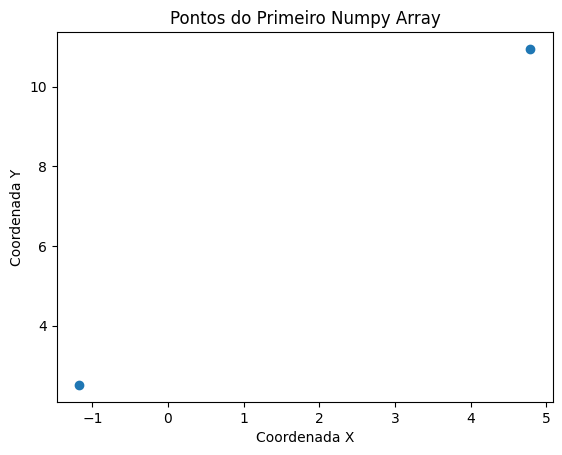

In [ ]:
plot_coordinates(historic_coordinates, 3)

In [ ]:
projection

,x,y
0,-1.720363,-1.068781
1,-1.165132,2.511952
2,0.938101,-0.382673
3,-0.921952,0.007297
4,-1.638459,-0.680244
...,...,...
95,-1.816060,-0.159002
96,0.155480,-0.506827
97,-1.852867,1.826409
98,-1.013836,-1.664196


In [ ]:
centroid_coordinates

array([[-1.17, 2.51],
       [4.79, 10.95],
       [6.34, -0.71]], dtype=object)

In [ ]:
def define_cluster_for_register(centroid_coordinates: np.ndarray, register: np.ndarray):

  current_cluster_dict = {'index': 0, 'distance': np.linalg.norm(register - centroid_coordinates[0])}

  for count, value in enumerate(centroid_coordinates[1:]):

    distance_beeing_checked = np.linalg.norm(register - value)

    if distance_beeing_checked < current_cluster_dict['distance']:

      current_cluster_dict["index"] = count + 1

      current_cluster_dict["distance"] = distance_beeing_checked

  return current_cluster_dict



In [ ]:
print(define_cluster_for_register(centroid_coordinates, projection.values[1])) #OK!

{'index': 0, 'distance': 0.005244621321398502}



essa funcao vai mapear cada um dos registros para seu cluster referente, de acordo com os indexes de cada centroide


In [ ]:
def check_which_cluster(centroid_coordinates: np.ndarray, projection: np.ndarray):

  centroid_dict = {}


  for i in range(len(centroid_coordinates)):

    centroid_dict[i] = []

  for count, value in enumerate(projection):

    cluster_result = define_cluster_for_register(centroid_coordinates, value)

    centroid_dict[cluster_result["index"]].append(value)

  return centroid_dict


In [ ]:
testi = check_which_cluster(centroid_coordinates, projection.values)

In [ ]:
testi[1]

[array([ 4.78505279, 10.947812  ])]

In [ ]:
testi[2]

[array([ 6.34416964, -0.710123  ]),
 array([ 1.95582211, -1.32427957]),
 array([5.51773758, 1.73001222]),
 array([ 3.52771163, -2.01576451]),
 array([3.98917053, 0.05602902]),
 array([ 2.12836947, -0.16834657]),
 array([3.91488217, 0.3138904 ]),
 array([ 2.19920468, -0.85985209]),
 array([4.9162953 , 2.16525809])]

In [ ]:
testi[0]

[array([-1.7203633 , -1.06878073]),
 array([-1.16513206,  2.51195171]),
 array([ 0.93810144, -0.38267333]),
 array([-0.92195242,  0.00729654]),
 array([-1.63845887, -0.68024447]),
 array([ 0.22073411, -0.77483302]),
 array([ 0.24455241, -1.28671207]),
 array([-0.47821392, -0.45707088]),
 array([-0.59797024, -0.36434528]),
 array([ 0.51082282, -1.3083436 ]),
 array([-0.71885638, -0.78130916]),
 array([ 1.53137325, -0.88050729]),
 array([-1.62550935,  0.2418838 ]),
 array([0.76445479, 1.84946833]),
 array([-1.88769959,  0.95024539]),
 array([-0.98957725, -1.57343347]),
 array([ 0.46505164, -0.09353503]),
 array([0.76142259, 0.06318726]),
 array([-0.16619961, -0.05158089]),
 array([ 0.38791488, -1.7379414 ]),
 array([2.79613028, 3.69227206]),
 array([-1.39686211,  1.93180406]),
 array([ 0.13130739, -1.62951614]),
 array([-1.47666204,  0.43862253]),
 array([-0.08193002, -1.76887589]),
 array([-0.03086237,  4.13261048]),
 array([-0.80867158, -0.86007075]),
 array([3.74601121, 4.29190859]),


In [ ]:
distancia_testi = testi[0]
type(distancia_testi)


list

In [ ]:
testi[0]

[array([-1.7203633 , -1.06878073]),
 array([-1.16513206,  2.51195171]),
 array([ 0.93810144, -0.38267333]),
 array([-0.92195242,  0.00729654]),
 array([-1.63845887, -0.68024447]),
 array([ 0.22073411, -0.77483302]),
 array([ 0.24455241, -1.28671207]),
 array([-0.47821392, -0.45707088]),
 array([-0.59797024, -0.36434528]),
 array([ 0.51082282, -1.3083436 ]),
 array([-0.71885638, -0.78130916]),
 array([ 1.53137325, -0.88050729]),
 array([-1.62550935,  0.2418838 ]),
 array([0.76445479, 1.84946833]),
 array([-1.88769959,  0.95024539]),
 array([-0.98957725, -1.57343347]),
 array([ 0.46505164, -0.09353503]),
 array([0.76142259, 0.06318726]),
 array([-0.16619961, -0.05158089]),
 array([ 0.38791488, -1.7379414 ]),
 array([2.79613028, 3.69227206]),
 array([-1.39686211,  1.93180406]),
 array([ 0.13130739, -1.62951614]),
 array([-1.47666204,  0.43862253]),
 array([-0.08193002, -1.76887589]),
 array([-0.03086237,  4.13261048]),
 array([-0.80867158, -0.86007075]),
 array([3.74601121, 4.29190859]),


In [ ]:
testi[0][0]

array([-1.7203633 , -1.06878073])

In [ ]:
matrix_testi = np.array(testi[0])

In [ ]:
sum_of_columns = np.sum(matrix_testi, axis=0)

print("Soma dos valores de cada coluna:")
print(sum_of_columns)

Soma dos valores de cada coluna:
[-36.27220914  42.49941923]


In [ ]:
matrix_testi = np.array(testi[1])

In [ ]:
sum_of_columns = np.sum(matrix_testi, axis=0)

print("Soma dos valores de cada coluna:")
print(sum_of_columns)

Soma dos valores de cada coluna:
[ 4.78505279 10.947812  ]


In [ ]:
matrix_testi = np.array(testi[2])

In [ ]:
sum_of_columns = np.sum(matrix_testi, axis=0)

print("Soma dos valores de cada coluna:")
print(sum_of_columns)

Soma dos valores de cada coluna:
[34.49336311 -0.81317602]


In [ ]:
def define_value_for_each_dimension_of_each_centroid(registers: np.ndarray):

  return np.sum(registers, axis= 0) / len(registers) #tenho que dividir para valores diferentes; ou seja, pela quantidade de registros em cada chave


In [ ]:
define_value_for_each_dimension_of_each_centroid(testi[0])

array([-0.40302455,  0.47221577])

In [ ]:
def new_centroid_coordinates(registers_dict: dict, length_how_many_centroids: int): #funcao para recalcular os centroides

  #tirar novo valor de cada dimensao de cada cluster a partir da media dos valores de cada dimensao de cada registro de cada cluster

  new_coordinates_dict = {}

  for i in range(length_how_many_centroids):

    new_coordinates_dict[i] = [] #testar sem essa linha dps

    new_coordinates_dict[i] = define_value_for_each_dimension_of_each_centroid(registers_dict[i])

  return np.array(list(new_coordinates_dict.values()), dtype= object)


In [ ]:
testi3 = new_centroid_coordinates(testi, len(testi))
testi3

array([[-0.4030245459967114, 0.4722157691990934],
       [4.785052794418216, 10.947811997031378],
       [3.832595900595041, -0.09035289087374891]], dtype=object)

In [ ]:
centroid_coordinates

array([[-1.17, 2.51],
       [4.79, 10.95],
       [6.34, -0.71]], dtype=object)

dps desenvolver a funcao para realizar essas funcoes em loop; e dps juntar tudo numa funcao geral tudo = funcao de definicao inicial e a funcao em seguida aí

In [ ]:
def redefine_centroid_and_apoint_each_register(centroid_coordinates: np.ndarray, projection: np.ndarray):

    while(True):

      centroid_coordinates_to_check_change = centroid_coordinates

      #> funcao pra definir qual cluster de cada e jogar em dict

      registers_dict = check_which_cluster(centroid_coordinates, projection.values)

      #>usar em dict na funcao para definir novas coordenadas

      centroid_coordinates = new_centroid_coordinates(registers_dict, len(centroid_coordinates))

      #> loop ate estabilizar ou atingir uma qtd predetermianda de iteracoes


      if np.array_equal(centroid_coordinates, centroid_coordinates_to_check_change):

        break

    return centroid_coordinates, registers_dict


In [ ]:
teste2 = redefine_centroid_and_apoint_each_register(centroid_coordinates, projection)

OI

OI

OI

OI

OI

OI

OI



In [ ]:
def geral(dataframe: pd.DataFrame, amt_centroids: int, random_seed: int = None):

  centroid_coordinates, historic_coordinates = initialize_centroids(amt_centroids = amt_centroids, dataframe = dataframe, random_seed = random_seed)

  return redefine_centroid_and_apoint_each_register(centroid_coordinates = centroid_coordinates, projection = projection)


In [ ]:
print(geral(projection, 3))

OI

OI

OI

OI

OI

OI

OI

OI

OI

OI

OI

(array([[2.8712768765363337, -0.04532240654423281],
       [1.1363489570890055, 4.716598196555913],
       [-0.8127712634742089, -0.11206426540046593]], dtype=object), {0: [array([ 6.34416964, -0.710123  ]), array([ 1.95582211, -1.32427957]), array([ 1.53137325, -0.88050729]), array([5.51773758, 1.73001222]), array([ 1.38344984, -0.68663452]), array([1.99685514, 1.42748085]), array([1.8254012 , 1.25306338]), array([ 1.86194757, -0.08374446]), array([ 3.52771163, -2.01576451]), array([ 1.51709766, -0.83235706]), array([3.98917053, 0.05602902]), array([ 2.12836947, -0.16834657]), array([ 1.33094226, -0.10928338]), array([3.91488217, 0.3138904 ]), array([ 2.19920468, -0.85985209]), array([4.9162953 , 2.16525809])], 1: [array([2.79613028, 3.69227206]), array([-0.03086237,  4.13261048]), array([3.74601121, 4.29190859]), array([-1.38190572,  5.47957508]), array([-0.98610072,  3.15076551]), array([0.6488258, 3.5127067]), array([0.5972534 , 7.1350364

JOGO OS VALORES PARA 2 CASAS DECIMAIS?